In [1]:
'''A function to be use later to help the gif run the graph without mixing next graphs'''
def nmes(i,n):
    if i<=n+1:
        if (i<100) or (2<len(str(i))<5):
            t=int(str(i)[0:2])
            if 0<(i or t)<10:
                prf="a"
            elif 9<(i or t)<20:
                prf='b'
            elif 19<(i or t)<30:
                prf='c'
            elif 29<(i or t)<40:    
                prf='d'
            elif 39<(i or t)<50:    
                prf='e'
            elif 49<(i or t)<60:    
                prf='f'
            elif 59<(i or t)<70:    
                prf='g'
            elif 69<(i or t)<80:    
                prf='h'
            elif 79<(i or t)<90:    
                prf='k'
            elif 89<(i or t)<100:
                prf='l'      
            if len(str(i)) ==(3 or 4):
                prf='m'+ str(t)
    return prf

In [2]:
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEIQRD Ebola Model on the Network
def seiqrdmodel(G, theta, gamma, delta, epsilon, rho, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    quaranode=[]
    recovernode=[]
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    qoutput=[]
    routput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        routput.append(len(recovernode))
        qoutput.append(len(quaranode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEIQRD EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=quaranode, node_color="pink")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagerg/SEIQRD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        death_list2 = []
        infection_list2 = []
        quaran_list=[]
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting individuals from infection to recovery at rate rho
        recovery_list=[]
        recovep=round(rho*len(infectnode))
        new_recove=np.random.choice(infectnode,recovep)
        for node in new_recove:
            if node not in recovery_list:
                recovery_list.append(node)         
        # Putting nodes from remaining infected into quarantine_list at rate delta
        infqua = []
        for node in infectnode:
            if node not in quaranode:
                if node not in infqua:
                    infqua.append(node)
        quaranp=round(delta*len(infqua))
        new_quaran=np.random.choice(infqua,quaranp)
        for node in new_quaran:
            if node not in quaranode:
                quaranode.append(node)      
        # Putting nodes from remaining infected into death_list at rate gamma
        infdeat = []
        for node in infectnode:
            if node not in quaranode:
                if node not in recovery_list:
                    if node not in infdeat:
                        infdeat.append(node)
        deathp=round(gamma*len(infdeat))
        new_death=np.random.choice(infdeat,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node) 
        # Putting remaining nodes from infected which are not in recovery_list or death_list or quarantine into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in quaranode:
                    if node not in recovery_list:
                        if node not in infection_list:
                            if node not in infection_list2:
                                infection_list2.append(node)
        # Putting nodes from quarantine into recovery_list2 at rate rho
        recovery_list2=[]
        if len(quaranode) != 0:
            qrecovp=round(rho*len(quaranode))
            new_recov2=np.random.choice(quaranode,qrecovp)
            for node in new_recov2:
                if node not in death_list:
                    if node not in infection_list:
                        if node not in infection_list2:
                            if node not in recovery_list:
                                if node not in recovery_list2:
                                    recovery_list2.append(node)        
        # Compiling the new recovery compartment which is the addition of the two lists
        recoverylists = recovery_list2 + recovery_list
        for node in recoverylists:
            if node not in infection_list:
                if node not in infection_list2:
                    if node not in death_list:
                        if node not in recovernode:
                            recovernode.append(node)
        # Putting remaining nodes from quarantine into death_list2 at rate epsilon
        quadeat=[]
        if len(quaranode) != 0:
            for node in quaranode:
                if node not in recovernode:
                        if node not in quadeat:
                            quadeat.append(node)
            qdeathp=round(epsilon*len(quadeat))
            if len(quadeat) != 0:
                new_death2=np.random.choice(quadeat,qdeathp)
                for node in new_death2:
                    if node not in death_list:
                        if node not in infection_list:
                            if node not in infection_list2:
                                if node not in death_list2:
                                    death_list2.append(node)
        # New deathnode is the nodes from the two death_lists append to the initial deaths
        datnod=death_list+death_list2
        for node in datnod:
            if node not in recovernode:
                if node not in infection_list:
                    if node not in infection_list2:
                        deathnode.append(node)
        # New quarantine excludes those lost to death and recovery
        for node in quaranode:
            if node not in deathnode:
                if node not in infection_list:
                    if node not in infection_list2:
                        if node not in recovernode:
                            if node not in quaran_list:
                                quaran_list.append(node)
        quaranode=quaran_list
        # New infectnode is nodes in infection_list and infection_list2 without overlapping
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                if node not in recovernode:
                    if node not in quaranode:
                        if node not in infectnode:
                            infectnode.append(node)
        # Putting remaining nodes from exposed which are not in other compartments into exposed_list
        for node in exposenode:
            if node not in deathnode:
                if node not in recovernode:
                    if node not in quaranode:
                        if node not in infectnode:
                            if node not in exposed_list:
                                exposed_list.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            if node not in quaranode:
                                if node not in recovernode:
                                    exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        if node not in quaranode:
                            if node not in recovernode:
                                if node not in susceptible_list:
                                    susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,qoutput,routput,doutput])

In [15]:
# Simulation for the Random Graph
import imageio 
import os
"""G = nx.erdos_renyi_graph(100,0.2)
time, n, theta, gamma, delta, epsilon, rho = 150,100,0.1,0.3,0.16,0.5,0.2
infection_start_node = 0
RGV=seiqrdmodel(G, theta, gamma, delta, epsilon, rho, time, infection_start_node)
RGV"""
png_dir = '/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagerg/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave("/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagerg/GIF/SEIQRD_on_RG_network.movie"+str(n)+".movie.gif", images,duration=0.8)


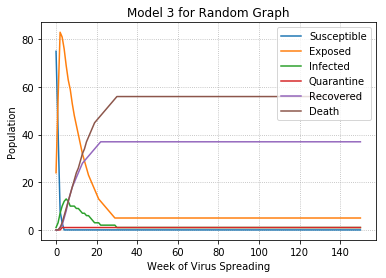

In [4]:
'''Random Graph - Visualizing EBOLA: Prevent-Treatment Stage'''
import matplotlib.pyplot as plt
s,e,i,q,r,d = RGV[0,:], RGV[1,:], RGV[2,:], RGV[3,:], RGV[4,:], RGV[5,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, q, label='Quarantine')
plt.plot(time, r, label='Recovered')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 3 for Random Graph')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagerg/SEIQRD EBOLA (Random Graph) - Data Parameter.png')
plt.show()

In [5]:
'''Barabasi Albert'''
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEIQRD Ebola Model on the Network
def seiqrdmodel(G, theta, gamma, delta, epsilon, rho, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    quaranode=[]
    recovernode=[]
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    qoutput=[]
    routput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        routput.append(len(recovernode))
        qoutput.append(len(quaranode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEIQRD EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=quaranode, node_color="pink")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimageba/SEIQRD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        death_list2 = []
        infection_list2 = []
        quaran_list=[]
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting individuals from infection to recovery at rate rho
        recovery_list=[]
        recovep=round(rho*len(infectnode))
        new_recove=np.random.choice(infectnode,recovep)
        for node in new_recove:
            if node not in recovery_list:
                recovery_list.append(node)         
        # Putting nodes from remaining infected into quarantine_list at rate delta
        infqua = []
        for node in infectnode:
            if node not in quaranode:
                if node not in infqua:
                    infqua.append(node)
        quaranp=round(delta*len(infqua))
        new_quaran=np.random.choice(infqua,quaranp)
        for node in new_quaran:
            if node not in quaranode:
                quaranode.append(node)      
        # Putting nodes from remaining infected into death_list at rate gamma
        infdeat = []
        for node in infectnode:
            if node not in quaranode:
                if node not in recovery_list:
                    if node not in infdeat:
                        infdeat.append(node)
        deathp=round(gamma*len(infdeat))
        new_death=np.random.choice(infdeat,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node) 
        # Putting remaining nodes from infected which are not in recovery_list or death_list or quarantine into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in quaranode:
                    if node not in recovery_list:
                        if node not in infection_list:
                            if node not in infection_list2:
                                infection_list2.append(node)
        # Putting nodes from quarantine into recovery_list2 at rate rho
        recovery_list2=[]
        if len(quaranode) != 0:
            qrecovp=round(rho*len(quaranode))
            new_recov2=np.random.choice(quaranode,qrecovp)
            for node in new_recov2:
                if node not in death_list:
                    if node not in infection_list:
                        if node not in infection_list2:
                            if node not in recovery_list:
                                if node not in recovery_list2:
                                    recovery_list2.append(node)        
        # Compiling the new recovery compartment which is the addition of the two lists
        recoverylists = recovery_list2 + recovery_list
        for node in recoverylists:
            if node not in infection_list:
                if node not in infection_list2:
                    if node not in death_list:
                        if node not in recovernode:
                            recovernode.append(node)
        # Putting remaining nodes from quarantine into death_list2 at rate epsilon
        quadeat=[]
        if len(quaranode) != 0:
            for node in quaranode:
                if node not in recovernode:
                        if node not in quadeat:
                            quadeat.append(node)
            qdeathp=round(epsilon*len(quadeat))
            if len(quadeat) != 0:
                new_death2=np.random.choice(quadeat,qdeathp)
                for node in new_death2:
                    if node not in death_list:
                        if node not in infection_list:
                            if node not in infection_list2:
                                if node not in death_list2:
                                    death_list2.append(node)
        # New deathnode is the nodes from the two death_lists append to the initial deaths
        datnod=death_list+death_list2
        for node in datnod:
            if node not in recovernode:
                if node not in infection_list:
                    if node not in infection_list2:
                        deathnode.append(node)
        # New quarantine excludes those lost to death and recovery
        for node in quaranode:
            if node not in deathnode:
                if node not in infection_list:
                    if node not in infection_list2:
                        if node not in recovernode:
                            if node not in quaran_list:
                                quaran_list.append(node)
        quaranode=quaran_list
        # New infectnode is nodes in infection_list and infection_list2 without overlapping
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                if node not in recovernode:
                    if node not in quaranode:
                        if node not in infectnode:
                            infectnode.append(node)
        # Putting remaining nodes from exposed which are not in other compartments into exposed_list
        for node in exposenode:
            if node not in deathnode:
                if node not in recovernode:
                    if node not in quaranode:
                        if node not in infectnode:
                            if node not in exposed_list:
                                exposed_list.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            if node not in quaranode:
                                if node not in recovernode:
                                    exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        if node not in quaranode:
                            if node not in recovernode:
                                if node not in susceptible_list:
                                    susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,qoutput,routput,doutput])

In [16]:
# Simulation for the Barabasi Albert Graph
import imageio 
import os
""""G = nx.barabasi_albert_graph(100,20)
time, n, theta, gamma, delta, epsilon, rho = 150,100,0.1,0.3,0.16,0.5,0.2
infection_start_node = 0
BAV=seiqrdmodel(G, theta, gamma, delta, epsilon, rho, time, infection_start_node)
BAV"""
png_dir = '/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimageba/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave("/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimageba/GIF/SEIQRD_on_BA_network.movie"+str(n)+".movie.gif", images,duration=0.2)


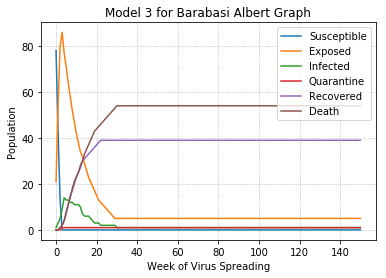

In [7]:
'''Barabasi Albert Graph - Visualizing EBOLA: Prevent-Treatment Stage'''
import matplotlib.pyplot as plt
s,e,i,q,r,d = BAV[0,:], BAV[1,:], BAV[2,:], BAV[3,:], BAV[4,:], BAV[5,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, q, label='Quarantine')
plt.plot(time, r, label='Recovered')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 3 for Barabasi Albert Graph')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimageba/SEIQRD EBOLA (Barabasi Albert Graph) - Data Parameter.png')
plt.show()

In [8]:
'''Watts Strogatz'''
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEIQRD Ebola Model on the Network
def seiqrdmodel(G, theta, gamma, delta, epsilon, rho, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    quaranode=[]
    recovernode=[]
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    qoutput=[]
    routput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        routput.append(len(recovernode))
        qoutput.append(len(quaranode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEIQRD EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=quaranode, node_color="pink")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=recovernode, node_color="green")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagews/SEIQRD EBOLA Model on a network=a'+str(z1)+str(i)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        death_list2 = []
        infection_list2 = []
        quaran_list=[]
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting individuals from infection to recovery at rate rho
        recovery_list=[]
        recovep=round(rho*len(infectnode))
        new_recove=np.random.choice(infectnode,recovep)
        for node in new_recove:
            if node not in recovery_list:
                recovery_list.append(node)         
        # Putting nodes from remaining infected into quarantine_list at rate delta
        infqua = []
        for node in infectnode:
            if node not in quaranode:
                if node not in infqua:
                    infqua.append(node)
        quaranp=round(delta*len(infqua))
        new_quaran=np.random.choice(infqua,quaranp)
        for node in new_quaran:
            if node not in quaranode:
                quaranode.append(node)      
        # Putting nodes from remaining infected into death_list at rate gamma
        infdeat = []
        for node in infectnode:
            if node not in quaranode:
                if node not in recovery_list:
                    if node not in infdeat:
                        infdeat.append(node)
        deathp=round(gamma*len(infdeat))
        new_death=np.random.choice(infdeat,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node) 
        # Putting remaining nodes from infected which are not in recovery_list or death_list or quarantine into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in quaranode:
                    if node not in recovery_list:
                        if node not in infection_list:
                            if node not in infection_list2:
                                infection_list2.append(node)
        # Putting nodes from quarantine into recovery_list2 at rate rho
        recovery_list2=[]
        if len(quaranode) != 0:
            qrecovp=round(rho*len(quaranode))
            new_recov2=np.random.choice(quaranode,qrecovp)
            for node in new_recov2:
                if node not in death_list:
                    if node not in infection_list:
                        if node not in infection_list2:
                            if node not in recovery_list:
                                if node not in recovery_list2:
                                    recovery_list2.append(node)        
        # Compiling the new recovery compartment which is the addition of the two lists
        recoverylists = recovery_list2 + recovery_list
        for node in recoverylists:
            if node not in infection_list:
                if node not in infection_list2:
                    if node not in death_list:
                        if node not in recovernode:
                            recovernode.append(node)
        # Putting remaining nodes from quarantine into death_list2 at rate epsilon
        quadeat=[]
        if len(quaranode) != 0:
            for node in quaranode:
                if node not in recovernode:
                        if node not in quadeat:
                            quadeat.append(node)
            qdeathp=round(epsilon*len(quadeat))
            if len(quadeat) != 0:
                new_death2=np.random.choice(quadeat,qdeathp)
                for node in new_death2:
                    if node not in death_list:
                        if node not in infection_list:
                            if node not in infection_list2:
                                if node not in death_list2:
                                    death_list2.append(node)
        # New deathnode is the nodes from the two death_lists append to the initial deaths
        datnod=death_list+death_list2
        for node in datnod:
            if node not in recovernode:
                if node not in infection_list:
                    if node not in infection_list2:
                        deathnode.append(node)
        # New quarantine excludes those lost to death and recovery
        for node in quaranode:
            if node not in deathnode:
                if node not in infection_list:
                    if node not in infection_list2:
                        if node not in recovernode:
                            if node not in quaran_list:
                                quaran_list.append(node)
        quaranode=quaran_list
        # New infectnode is nodes in infection_list and infection_list2 without overlapping
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                if node not in recovernode:
                    if node not in quaranode:
                        if node not in infectnode:
                            infectnode.append(node)
        # Putting remaining nodes from exposed which are not in other compartments into exposed_list
        for node in exposenode:
            if node not in deathnode:
                if node not in recovernode:
                    if node not in quaranode:
                        if node not in infectnode:
                            if node not in exposed_list:
                                exposed_list.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            if node not in quaranode:
                                if node not in recovernode:
                                    exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        if node not in quaranode:
                            if node not in recovernode:
                                if node not in susceptible_list:
                                    susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,qoutput,routput,doutput])

In [17]:
# Simulation for the Watts Strogatz Graph
import imageio 
import os
""""G = nx.watts_strogatz_graph(100, 20, 0.7)
time, n, theta, gamma, delta, epsilon, rho = 150,100,0.1,0.3,0.16,0.5,0.2
infection_start_node = 0
WSV=seiqrdmodel(G, theta, gamma, delta, epsilon, rho, time, infection_start_node)
WSV"""
png_dir = '/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagews/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave("/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagews/GIF/SEIQRD_on_WS_network.movie"+str(n)+".movie.gif", images,duration=0.2)


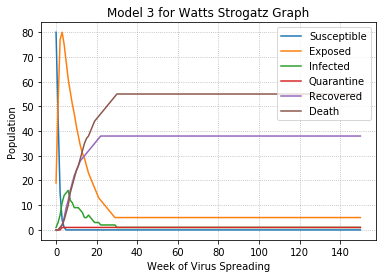

In [10]:
'''Watts Strogatz Graph - Visualizing EBOLA: Prevent-Treatment Stage'''
import matplotlib.pyplot as plt
s,e,i,q,r,d = WSV[0,:], WSV[1,:], WSV[2,:], WSV[3,:], WSV[4,:], WSV[5,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, q, label='Quarantine')
plt.plot(time, r, label='Recovered')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 3 for Watts Strogatz Graph')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/seiqrdimagews/GIF/SEIQRD EBOLA (Watts Strogatz Graph) - Data Parameter.png')
plt.show()

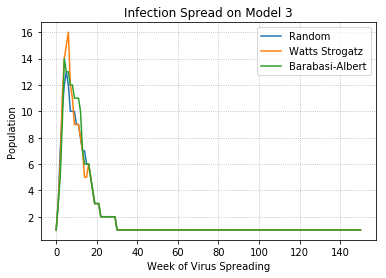

In [11]:
'''Visualizing EBOLA Infection in from the Three Graphs'''
import matplotlib.pyplot as plt
i1,i2,i3 = RGV[2,:], WSV[2,:], BAV[2,:]
plt.plot(time, i1, label='Random')
plt.plot(time, i2, label='Watts Strogatz')
plt.plot(time, i3, label='Barabasi-Albert')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Infection Spread on Model 3')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/3Graph_I/ALL INFECTION IN EBOLA MODEL 3 on Network - Data Parameter.png')
plt.show()

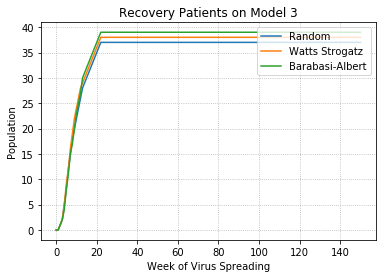

In [12]:
'''Visualizing EBOLA Recovery in from the Three Graphs'''
import matplotlib.pyplot as plt
r1,r2,r3 = RGV[4,:], WSV[4,:], BAV[4,:]
plt.plot(time, r1, label='Random')
plt.plot(time, r2, label='Watts Strogatz')
plt.plot(time, r3, label='Barabasi-Albert')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Recovery Patients on Model 3')
plt.xlabel('Week of Virus Spreading')
plt.ylabel('Population')
plt.savefig('/Users/User/Documents/Academic Materials/Diffusion/Project/3Graph_R/ALL RECOVERY IN EBOLA MODEL 3 on Network - Data Parameter.png')
plt.show()